# Building a general purpose chatbot

In this practical exercise, your goal will be to implement the different tasks in a general purpose chatbot.

The code below will help you load the data.

In [1]:
# !pip install gdown

In [2]:
!gdown --id 1JipPFr14hWBoQ0tnEJyTrOh5RoGFhaf3
!gdown --id 12DkcmwEEuitna9XJNYD9mBhDdaTzsWcS
!gdown --id 1iU73m8iDxEcqAmmLc4i_cudFOWJQMORY

/home/moyobradley7/Epita/ING_2/.venv/lib/python3.11/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JipPFr14hWBoQ0tnEJyTrOh5RoGFhaf3
To: /home/moyobradley7/Epita/ING_2/NLP/train.csv
100%|████████████████████████████████████████| 812k/812k [00:00<00:00, 5.27MB/s]
/home/moyobradley7/Epita/ING_2/.venv/lib/python3.11/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12DkcmwEEuitna9XJNYD9mBhDdaTzsWcS
To: /home/moyobradley7/Epita/ING_2/NLP/val.csv
100%|████████████████████████████████████████| 165k/165k [00:00<00:00, 4.83MB/s]
/home/moyobradley7/Epita/ING_2/.venv/lib/python3.11/site-packages/gdown/__ma

In [3]:
import pandas as pd

train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')
intent_responses = pd.read_csv('intent_response.csv')
train_df.head()

,sentence,intent
0,what expression would i use to say i love you ...,translate
1,can you tell me how to say 'i do not speak muc...,translate
2,"what is the equivalent of, 'life is good' in f...",translate
3,"tell me how to say, 'it is a beautiful morning...",translate
4,"if i were mongolian, how would i say that i am...",translate


The dataset has a 100 examples for many intents ('translate', 'transfer', 'timer', 'definition', 'meaning_of_life',
 'insurance_change', 'find_phone', 'travel_alert', 'pto_request'...).

Your ultimate goal will be to build a general purpose assistant that detects the user intent and relevant entities and provides generic answers. You will also try to discover if there are out of scope intents in the dataset.

## Exercise

In this exercise, you are asked to implement the following:

1) EDA:
* Count the number of the classes and the number of examples in the training set.
* Display, on three histograms, the 20 words (without the english stop-words) with the highest counts for the classes 'transfer', 'timer' and 'meaning_of_life'.
* What is the average number of words in the sentences?

2) Data preparation:
* Create a new column `processed_sentence` where you remove stop words, punctuation and perform lemmatization on column `sentence`. You can use the library of your choice (spacy, nltk, other...). (Execution takes about 2/3 min with spacy model `en_core_web_md`).
* Separate the class `oos` from the datasets (remove it from `train_df`, `val_df` and put it in two new dataframes `train_df_oos` and `eval_df_oos`).


3) Topic modeling:
* Build the TF-IDF matrix without stop words using the column `sentence` from `train_df`.
* Run LSA on it with 20 components.
* Display the obtained topics (top 5 words with their weights).
* Display all the distinct intents from `train_df`.
* Do you see a relationship between the automatically extracted topics and the real intents?
* Try to find some topics in all oos sentence (train and eval). You can use LSA and also display the sentences. Are these topics different from the existing intents?

4) Classification:
* Build the bag of words matrices (word counts, not tfidf) for the column `sentence` and for the column `processed_sentence`, for train and eval.
* Train two Logistic Regression classifiers, one from each train matrix.
* Evaluate both with accuracy and the micro F1 score on the eval set.
* Switch to TF-IDF and see if the scores are better.
* Select the best approach, train it on the follow subset of intents and and display the evaluation confusion matrix: 'translate', 'transfer', 'definition', 'change_language', 'payday', 'replacement_card_duration', 'balance', 'pay_bill', 'spending_history', 'credit_score', 'report_lost_card', 'damaged_card', 'credit_limit', 'account_blocked', 'report_fraud', 'direct_deposit', 'interest_rate', 'credit_limit_change', 'card_declined'.
* Which pair of intents are the most confused together?

5) Named Entity Recognition:

For this task, let us focus on the following intents: **change_user_name, time, change_language, pto_request, travel_alert, timer, translate**.
* Display 10 random training sentences from each intent. What are all the kinds of entities to recognize in these sentences?
* Instantiate the spacy english model.
* Add rule based recognition for entities languages, dates, and countries (some code snippets are provided below to help)
* Display the entities detected by the model for the ten first sentences of the relevant intents.

6) Chatbot: Now that you are able to detect the intents and extract the entities, build a simple loop that executes this scenario:
* Ask the user to enter a sentence.
* Extract the entities and the user intent.
* Display the intent, the entities, and a generic response using `intent_responses`.

Play the code and ask the following questions to show what happens:
* "How do you say hello in French?"
* "I want to go on holidays from 2021-01-12 to 2021-01-25"
* "What is the weather in Germany?"
* "Can you set the language to Spanish?"

## 1) EDA

number of the classes and the number of examples in the training set

In [4]:
print(len(train_df['intent'].unique()))
train_df.intent.value_counts()

151


intent
oos                          100
translate                    100
transfer                     100
timer                        100
definition                   100
                            ... 
fun_fact                     100
change_language              100
payday                       100
replacement_card_duration    100
time                         100
Name: count, Length: 151, dtype: int64

Display, on three histograms, the 20 words (without the english stop-words) with the highest counts for the classes 'transfer', 'timer' and 'meaning_of_life'.

In [5]:
# !pip install seaborn
# !pip install stop_words
#!pip install  plotly.express
# !pip install nbformat --upgrade
# !pip install ipywidgets
# !pip install nbformat --upgrade


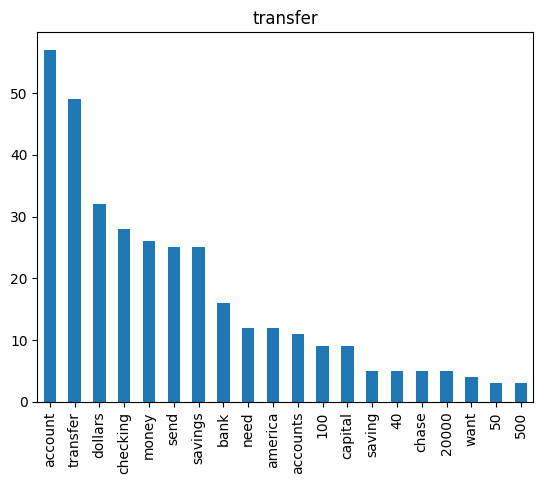

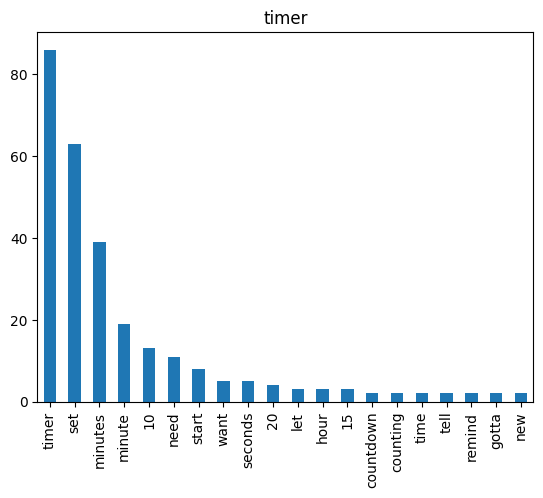

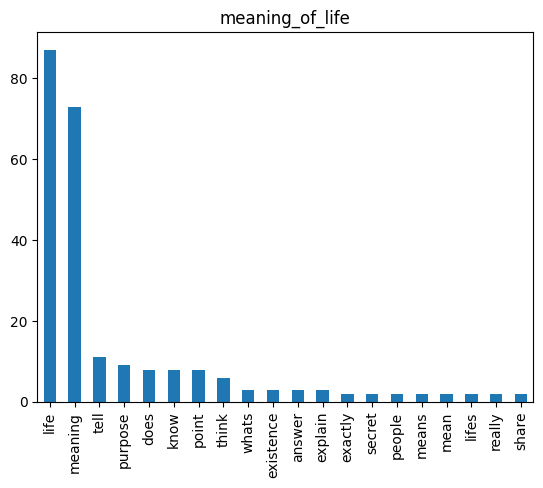

In [6]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt

def plot_most_common_words(df, intent, n=20):
    words = df[df.intent == intent].sentence
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(words)
    words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    words = words.sum().sort_values(ascending=False).head(n)
    words.plot(kind='bar')
    plt.title(intent)
    plt.show()

plot_most_common_words(train_df, 'transfer')
plot_most_common_words(train_df, 'timer')
plot_most_common_words(train_df, 'meaning_of_life')

What is the average number of words in the sentences?

In [7]:
train_df.sentence.apply(lambda x: len(x.split())).mean()

8.330728476821193

## 2) Data preparation:

Create a new column `processed_sentence` where you remove stop words, punctuation and perform lemmatization on column `sentence`. You can use the library of your choice (spacy, nltk, other...). (Execution takes about 2/3 min with spacy model `en_core_web_md`).

In [10]:
#!pip install spacy
#!pip install --upgrade numpy thinc

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [12]:
#!python3 -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 9.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [13]:
import spacy
nlp = spacy.load('en_core_web_md')

def process_sentence(sentence):
    doc = nlp(sentence)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct]) 

train_df['processed_sentence'] = train_df.sentence.apply(process_sentence)
val_df['processed_sentence'] = val_df.sentence.apply(process_sentence)

train_df.head()


,sentence,intent,processed_sentence
0,what expression would i use to say i love you ...,translate,expression use love italian
1,can you tell me how to say 'i do not speak muc...,translate,tell speak spanish spanish
2,"what is the equivalent of, 'life is good' in f...",translate,equivalent life good french
3,"tell me how to say, 'it is a beautiful morning...",translate,tell beautiful morning italian
4,"if i were mongolian, how would i say that i am...",translate,mongolian tourist


Separate the class `oos` from the datasets (remove it from `train_df`, `val_df` and put it in two new dataframes `train_df_oos` and `eval_df_oos`).

In [14]:
train_df_oos = train_df[train_df['intent'] == 'oos']
train_df = train_df[train_df['intent'] != 'oos']
eval_df_oos = val_df[val_df['intent'] == 'oos']
val_df = val_df[val_df['intent'] != 'oos']


train_df_oos.intent.value_counts()


intent
oos    100
Name: count, dtype: int64

In [15]:
eval_df_oos.intent.value_counts()

intent
oos    100
Name: count, dtype: int64

## 3) Topic modeling:

Build the TF-IDF matrix without stop words using the column `sentence` from `train_df`.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
vectorizer = TfidfVectorizer(stop_words='english', preprocessor=remove_punctuation)
X_train = vectorizer.fit_transform(train_df.sentence)
# X_val = vectorizer.transform(val_df.sentence)
#X_train.shape 

#  Run LSA on it with 20 components.
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=20)
X_train = lsa.fit_transform(X_train)
# X_val = lsa.transform(X_val)
X_train.shape


        

(15000, 20)

3) Afficher les sujets obtenue (5premiers mot aves poids)

In [19]:
import numpy as np
for sujet, component in enumerate(lsa.components_):
    print('Sujet', sujet, ':')
    top_words = [(vectorizer.get_feature_names_out()[idx], component[idx]) for idx in np.argsort(-component)[:5]]
    for word, weight in top_words:
        print(f"{word}: {weight}")
    print()

Sujet 0 :
card: 0.4615208779326573
credit: 0.4102577141918139
need: 0.35344690903750936
know: 0.293846042064225
tell: 0.2810051801515836

Sujet 1 :
credit: 0.4169643586217431
card: 0.41373247798429036
limit: 0.13078515559907763
score: 0.1305192036306729
apr: 0.07433957904987883

Sujet 2 :
tell: 0.8525785503542033
list: 0.2373190833064966
shopping: 0.14467620091058725
whats: 0.06352212130343482
joke: 0.048897006951713395

Sujet 3 :
change: 0.49642047154796126
oil: 0.4093949684217779
tell: 0.18168619567277378
car: 0.17077652650870723
credit: 0.10968514658464044

Sujet 4 :
list: 0.6231451384555164
shopping: 0.4163774076193167
change: 0.25306040590706685
oil: 0.2007585588678222
credit: 0.11012450619156441

Sujet 5 :
account: 0.5280870995277416
bank: 0.30911115473126816
whats: 0.2459353648830073
change: 0.19024259391994586
like: 0.1761256811785685

Sujet 6 :
know: 0.5001696724624493
credit: 0.20576417740808037
oil: 0.1587155252947011
score: 0.15713504327532288
let: 0.14323771781049946

Suje

4. Display all the distinct intents from `train_df`.

In [20]:
for intent in train_df['intent'].unique():
    print(intent)

translate
transfer
timer
definition
meaning_of_life
insurance_change
find_phone
travel_alert
pto_request
improve_credit_score
fun_fact
change_language
payday
replacement_card_duration
time
application_status
flight_status
flip_coin
change_user_name
where_are_you_from
shopping_list_update
what_can_i_ask_you
maybe
oil_change_how
restaurant_reservation
balance
confirm_reservation
freeze_account
rollover_401k
who_made_you
distance
user_name
timezone
next_song
transactions
restaurant_suggestion
rewards_balance
pay_bill
spending_history
pto_request_status
credit_score
new_card
lost_luggage
repeat
mpg
oil_change_when
yes
travel_suggestion
insurance
todo_list_update
reminder
change_speed
tire_pressure
no
apr
nutrition_info
calendar
uber
calculator
date
carry_on
pto_used
schedule_maintenance
travel_notification
sync_device
thank_you
roll_dice
food_last
cook_time
reminder_update
report_lost_card
ingredient_substitution
make_call
alarm
todo_list
change_accent
w2
bill_due
calories
damaged_card
res

Do you see a relationship between the automatically extracted topics and the real intents?

Oui contate une relation entre les sujets extrait et les intentions réelles par exemple le sujet 1  nous parle de carte de crédit, cela nous fait penser à des transfers d'argent. On retrouve aussi le mot find dans un des sujets et une des intentions est find_phone.

Try to find some topics in all oos sentence (train and eval). You can use LSA and also display the sentences. Are these topics different from the existing intents?

In [22]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
vectorizer2 = TfidfVectorizer(stop_words='english', preprocessor=remove_punctuation)
X_train_oos = vectorizer2.fit_transform(train_df_oos.sentence)
X_eval_oos = vectorizer2.fit_transform(eval_df_oos.sentence)
lsa2 = TruncatedSVD(n_components=20)
X_train_oos = lsa2.fit_transform(X_train_oos)
X_eval_oos = lsa2.fit_transform(X_eval_oos)



#display_topics(lsa2, vectorizer2.get_feature_names_out(), 5)
print("Sujets obtenus à partir des phrases OOS:")
for i, component in enumerate(lsa2.components_):
    top_words_idx = np.argsort(-component)[:5]
    top_words = [vectorizer2.get_feature_names_out()[idx] for idx in top_words_idx]
    print(f"Sujet {i+1}: {', '.join(top_words)}")

Sujets obtenus à partir des phrases OOS:
Sujet 1: news, fake, tell, publishes, site
Sujet 2: does, work, democracy, mean, cybersecurity
Sujet 3: best, whats, 2019, engineering, game
Sujet 4: black, holes, come, eggs, possible
Sujet 5: birds, fly, wings, bad, habits
Sujet 6: bad, habits, inform, overcoming, related
Sujet 7: better, android, iphone, headphones, ear
Sujet 8: engineering, naval, states, united, electrical
Sujet 9: dog, breed, 2018, engineering, know
Sujet 10: brexit, finalized, right, nowu, happening
Sujet 11: ducks, eat, sleep, democracy, vegetables
Sujet 12: dream, eat, ducks, mean, building
Sujet 13: president, time, 13th, floridau, visited
Sujet 14: autism, eggs, people, genetic, disease
Sujet 15: autism, bank, people, set, disease
Sujet 16: autism, cannabis, whats, people, genetic
Sujet 17: new, 2019, reality, shows, look
Sujet 18: eggs, come, bank, whats, different
Sujet 19: president, 13th, chess, tell, floridau
Sujet 20: compute, tell, eggs, cannabis, ounce


In [23]:
# display existing intents
train_df_oos.sentence.unique()

array(['how much is an overdraft fee for bank',
       'why are exponents preformed before multiplication in the order of operations',
       'what size wipers does this car take', 'where is the dipstick',
       'how much is 1 share of aapl', 'how is glue made',
       'any headlines from my area',
       'what is the largest state in the us',
       'what is the current market trend',
       'what is the most popular airline',
       'what is the formula for the circumference of a circle',
       'what are some ways to reduce spending',
       'what time does the louvre open',
       'are there any local stations covering the moral march in raleigh in februaryu',
       'how many planets have we discovered',
       'how do i change my billing address',
       'how do i open an online line of credit',
       'how do i remove a coffee blemish',
       'how expensive is an apple share',
       'where can i find the cruise control on my kia sportage 2010',
       'how many sides are in a

## 4) Classification:

In [34]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(stop_words='english')
vectorizer2 = CountVectorizer(stop_words='english')
vectors_train_sentence = vectorizer1.fit_transform(train_df['sentence'])
vectors_train_processed = vectorizer2.fit_transform(train_df['processed_sentence'])
vectors_eval_sentence = vectorizer1.transform(val_df['sentence'])
vectors_eval_processed = vectorizer2.transform(val_df['processed_sentence'])
print(vectorizer.vocabulary_)

print(vectors_train_sentence.toarray()) # Sac de mot pour train['setence']
print(vectors_train_processed.toarray())
print(vectors_eval_sentence.toarray())
print(vectors_eval_processed.toarray())

{'expression': 1722, 'use': 4695, 'say': 3908, 'love': 2700, 'italian': 2373, 'tell': 4412, 'speak': 4163, 'spanish': 4160, 'equivalent': 1656, 'life': 2610, 'good': 2008, 'french': 1907, 'beautiful': 649, 'morning': 2964, 'mongolian': 2948, 'tourist': 4553, 'hotel': 2198, 'finnish': 1824, 'need': 3039, 'translate': 4584, 'sentence': 3963, 'soon': 4140, 'portuguese': 3438, 'ask': 532, 'taxi': 4394, 'bread': 763, 'correct': 1219, 'way': 4811, 'visitor': 4767, 'dont': 1516, 'know': 2510, 'answer': 453, 'like': 2616, 'proper': 3515, 'greet': 2043, 'adult': 329, 'words': 4890, 'lost': 2691, 'japanese': 2399, 'thank': 4444, 'russian': 3850, 'normally': 3092, 'person': 3334, 'hello': 2139, 'english': 1636, 'subway': 4294, 'hi': 2148, 'england': 1635, 'said': 3868, 'twin': 4634, 'chinese': 1028, 'people': 3318, 'word': 4889, 'cow': 1241, 'goodbye': 2009, 'atm': 552, 'machine': 2728, 'grocery': 2050, 'germans': 1978, 'goodnight': 2010, 'russians': 3851, 'notebook': 3101, 'vietnameses': 4754, '

* Train two Logistic Regression classifiers, one from each train matrix.
* Evaluate both with accuracy and the micro F1 score on the eval set.
* Switch to TF-IDF and see if the scores are better.

In [35]:
# Train two Logistic Regression classifiers, one from each train matrix.

from sklearn.linear_model import LogisticRegression

LR_sentence = LogisticRegression(max_iter=1000)
LR_sentence.fit(vectors_train_sentence, train_df['intent'])

LR_processed = LogisticRegression(max_iter=1000)
LR_processed.fit(vectors_train_processed, train_df['intent'])


LogisticRegression(max_iter=1000)

In [36]:
# Evaluate both with accuracy and the micro F1 score on the eval set.
from sklearn.metrics import accuracy_score, f1_score

LR_sentence_pred = LR_sentence.predict(vectors_eval_sentence)
print('Sentence :')
print('precision:', accuracy_score(val_df['intent'], LR_sentence_pred))
print('F1:', f1_score(val_df['intent'], LR_sentence_pred, average='micro'))

LR_processed_pred = LR_processed.predict(vectors_eval_processed)
print('Processed :')
print('precision:', accuracy_score(val_df['intent'], LR_processed_pred))
print('F1:', f1_score(val_df['intent'], LR_processed_pred, average='micro'))

Sentence :
precision: 0.8166666666666667
F1: 0.8166666666666667
Processed :
precision: 0.807
F1: 0.807


In [37]:
# Switch to TF-IDF and see if the scores are better.
vectorizer1 = TfidfVectorizer(stop_words='english')
vectorizer2 = TfidfVectorizer(stop_words='english')

vectors_train_sentence = vectorizer1.fit_transform(train_df['sentence'])
vectors_train_processed = vectorizer2.fit_transform(train_df['processed_sentence'])
vectors_eval_sentence = vectorizer1.transform(val_df['sentence'])
vectors_eval_processed = vectorizer2.transform(val_df['processed_sentence'])

LR_sentence_tfidf = LogisticRegression(max_iter=1000)
LR_sentence_tfidf.fit(vectors_train_sentence, train_df['intent'])

LR_processed_tfidf = LogisticRegression(max_iter=1000)
LR_processed_tfidf.fit(vectors_train_processed, train_df['intent'])


LR_sentence_pred_tfidf = LR_sentence_tfidf.predict(vectors_eval_sentence)
print('Sentence (TF-IDF):')
print('Precision:', accuracy_score(val_df['intent'], LR_sentence_pred_tfidf))
print('F1:', f1_score(val_df['intent'], LR_sentence_pred_tfidf, average='micro'))

LR_processed_pred_tfidf = LR_processed_tfidf.predict(vectors_eval_processed)
print('Processed (TF-IDF):')
print('Precision:', accuracy_score(val_df['intent'], LR_processed_pred_tfidf))
print('F1:', f1_score(val_df['intent'], LR_processed_pred_tfidf, average='micro'))


Sentence (TF-IDF):
Precision: 0.81
F1: 0.81
Processed (TF-IDF):
Precision: 0.8013333333333333
F1: 0.8013333333333333


 Select the best approach, train it on the follow subset of intents and and display the evaluation confusion matrix: 'translate', 'transfer', 'definition', 'change_language', 'payday', 'replacement_card_duration', 'balance', 'pay_bill', 'spending_history', 'credit_score', 'report_lost_card', 'damaged_card', 'credit_limit', 'account_blocked', 'report_fraud', 'direct_deposit', 'interest_rate', 'credit_limit_change', 'card_declined'.
* Which pair of intents are the most confused together?

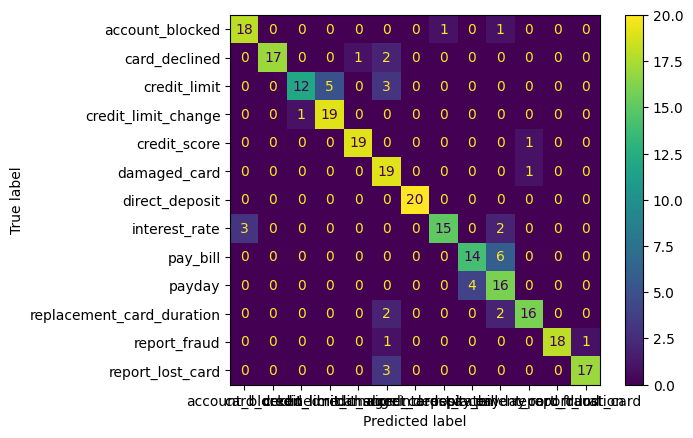

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# sous-ensemble d'intentions
sousEnsemble = ['traduire', 'transfert', 'définition', 'change_langue', 'payday', 'replacement_card_duration', 'solde', 'pay_bill', 'sending_history', 'credit_score', 'report_lost_card', 'damaged_card', 'credit_limit', 'account_blocked', 'report_fraud', 'direct_deposit', 'interest_rate', 'credit_limit_change', 'card_declined']

new_train_df = train_df[train_df['intent'].isin(sousEnsemble)]
new_val_df = val_df[val_df['intent'].isin(sousEnsemble)]

vectorizer1 = CountVectorizer(stop_words='english')
vectors_train_sentence = vectorizer1.fit_transform(new_train_df['sentence'])
vectors_eval_sentence = vectorizer1.transform(new_val_df['sentence'])

LR_best = LogisticRegression(max_iter=1000)
LR_best.fit(vectors_train_sentence, new_train_df['intent'])


LR_simple_pred = cross_val_predict(LR_best, vectors_eval_sentence, new_val_df['intent'], cv=5)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(new_train_df['intent'])
y_test = le.transform(new_val_df['intent'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(new_val_df['intent'], LR_simple_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
disp.plot()


the most common intent in the training set are 'pay_bill' and 'payday'

## 5) Named Entity Recognition:



* 
* 
* Display the entities detected by the model for the ten first sentences of the relevant intents.

1. we focus on some intents

In [39]:
selected_intentions = ['change_user_name', 'time', 'change_lingual', 'pto_request', 'travel_alert', 'timer', 'Translate']
selected_train_df = train_df[train_df['intent'].isin(selected_intentions)]
selected_val_df = val_df[val_df['intent'].isin(selected_intentions)]

2. Display 10 random training sentences from each intent.

In [40]:
import random

for intent in selected_intentions:
    print(intent,':')
    temp_train_df = selected_train_df[selected_train_df['intent'] == intent]
    random_sentences = temp_train_df.sample(n=min(10, len(temp_train_df)))['sentence'].tolist()
    for i, sentence in enumerate(random_sentences, start=1):
        print(f"{i}. {sentence}")
    print()

change_user_name :
1. my name is jim
2. i go by the name jim
3. i want you to call me lord
4. you can call me cindy
5. you can call me carrie
6. please start calling me mandy
7. you can call me al
8. my name is john
9. can i change my nickname
10. people call me brad

time :
1. what is the time in the utc timezone
2. what time is it getting to be
3. i need to know what time it is in florida
4. time in tokyo
5. would you tell me the current time in the eastern timezone
6. what time is it exactly in the new zealand time zone
7. can you tell me the current time
8. current time, please
9. what is the time right now
10. what's the current time in greenwhich

change_lingual :

pto_request :
1. on march 1-2 i want a pto request made for me
2. i need help making a pto request for march 3-10
3. could you submit a pto request for me for dates april 21 to 30, please
4. i would like you put in a pto request for the dates july 4th to the 8th
5. please assist me by making a pto request for march 11-

Entities to recognize in these sentences are Names, addresses, dates, organizations ...

3. Instantiate the spacy english model.

In [41]:
import spacy
nlp = spacy.load("en_core_web_sm", disable = ['tagger', 'parser', 'ner'])

4. Add rule based recognition for entities languages, dates, and countries (some code snippets are provided below to help)

In [42]:
!pip install geonamescache
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 6.8 MB/s eta 0:00:00a 0:00:01


In [43]:
# getting a list of countries  using pycountry
import pycountry
countries = [x.name for x in list(pycountry.countries)]

In [44]:
# hard coded languages
languages = [
    "English",
    "Spanish",
    "French",
    "German",
    "Chinese",
    "Hindi",
    "Arabic",
    "Bengali",
    "Russian",
    "Portuguese",
    "Japanese",
    "Punjabi",
    "Bengali",
    "Telugu",
    "Marathi",
    "Tamil",
    "Urdu",
    "Turkish",
    "Italian",
    "Vietnamese",
    "Korean",
    "Thai",
    "Malay",
    "Persian",
    "Polish",
    "Cantonese",
    "Ukrainian",
    "Romanian",
    "Dutch",
    "Swedish",
    "Gujarati",
    "Indonesian",
    "Greek",
    "Czech",
    "Hebrew",
    "Danish",
    "Norwegian",
    "Finnish",
    "Hungarian",
    "Slovak",
    "Bulgarian",
    "Croatian",
    "Serbian",
    "Slovenian",
    "Lithuanian",
    "Latvian",
    "Estonian",
    "Kazakh",
    "Georgian",
    "Tatar",
    "Kyrgyz",
    "Belarusian",
    "Mongolian",
    "Azerbaijani",
    "Uzbek",
    "Tajik",
    "Turkmen",
    "Armenian",
    "Bosnian",
    "Albanian",
    "Macedonian",
    "Montenegrin",
    "Bislama",
    "Fijian",
    "Hawaiian",
    "Samoan",
    "Tongan",
    "Tahitian",
    "Marshallese",
    "Palauan",
    "Chamorro"
]

In [45]:
ruler = nlp.add_pipe("entity_ruler")
patterns = [{"label": "COUNTRY", "pattern": [{"LOWER":ct.lower()}]} for ct in countries]
ruler.add_patterns(patterns)
date_patterns = [
    {"label": "DATE", "pattern": [{"LOWER": {"IN": ["january", "february", "march","april","may","june","july","august","september","october","november","december"]}},{"TEXT": {"REGEX": "^[0-9]+"}}]},
    {"label": "DATE", "pattern": [{"LOWER": {"IN": ["january", "february", "march","april","may","june","july","august","september","october","november","december"]}}]}
]

# Ajouter les motifs de langue et de date à l'entity ruler
ruler.add_patterns([{"label": "LANGUAGE", "pattern": [{"LOWER": lang.lower()}]} for lang in languages])
ruler.add_patterns(date_patterns)

5. display detected entities

In [46]:
#test 
doc = nlp("Test France speak Cantonese in January 16")
print([(ent.text, ent.label_) for ent in doc.ents])

for intent in selected_intentions:
    print("Intent:",intent)
    relevant_sentences = selected_train_df[selected_train_df['intent'] == intent]['sentence'].head(10)
    for i, sentence in enumerate(relevant_sentences):
        doc = nlp(sentence)
        print(sentence)
        print([(ent.text, ent.label_) for ent in doc.ents])
        print()

[('France', 'COUNTRY'), ('Cantonese', 'LANGUAGE'), ('January 16', 'DATE')]
Intent: change_user_name
please change the name you refer to me by
[]

how do i change the name you use to address me
[]

is there a way i can change the name you use to address me
[]

i need to change my name to something else for you to call me
[]

can i have you call me something else
[]

i go by brad
[]

usually people refer to me as brad
[]

i prefer to go by brad
[]

people call me brad
[]

my name is brad
[]

Intent: time
what time is it in punta gorda, florida
[]

what time is it in glenwood springs, co
[]

what time is it in fredericksburg, tx
[]

what time is it in las vegas, nv
[]

what time is it in houston, tx
[]

i need to know the current time in the central timezone
[]

would you tell me the current time in the eastern timezone
[]

let me know the current time in the central timezone
[]

tell me what time it is in the central timezone
[]

i am needing to know the current time in the eastern timez

/home/moyobradley7/Epita/ING_2/.venv/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/home/moyobradley7/Epita/ING_2/.venv/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/home/moyobradley7/Epita/ING_2/.venv/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attrib

## 6) Chatbot:

Chatbot: Now we are able to detect the intents and extract the entities, we can build a simple loop that executes this scenario:
* Ask the user to enter a sentence.
* Extract the entities and the user intent.
* Display the intent, the entities, and a generic response using `intent_responses`.


In [47]:
while True:
  sentence = input('Type your sentence (exit to quit):')
  if sentence == 'exit':
    break
  doc = nlp(sentence)
  print(sentence)
  print([(ent.text, ent.label_) for ent in doc.ents])
  vectors_phrase_a_predire = vectorizer1.transform([sentence])
  print('prediction intention:',LR_best.predict(vectors_phrase_a_predire))

/home/moyobradley7/Epita/ING_2/.venv/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Hello world I like Football since l am 5 years old
[]
prediction intention: ['payday']


/home/moyobradley7/Epita/ING_2/.venv/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Hello world I like France because many bank and Money
[('France', 'COUNTRY')]
prediction intention: ['account_blocked']

[]
prediction intention: ['payday']

[]
prediction intention: ['payday']
